In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [5]:
df = pd.read_csv('/content/titanic_toy.csv')

In [6]:
df.head(2)

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1


In [7]:
df.isnull().sum()

,0
Age,177
Fare,45
Family,0
Survived,0


In [8]:
x = df.drop(columns=['Survived'])
y = df['Survived']

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [18]:
x_train['Age_99'] = x_train['Age'].fillna(99)
x_train['Age_minus1'] = x_train['Age'].fillna(-1)

x_train['Fare_999'] = x_train['Fare'].fillna(999)
x_train['Fare_minus1'] = x_train['Fare'].fillna(-1)

In [19]:
print('Original Age variable variance: ', x_train['Age'].var())
print('Age Variance after 99 wala imputation: ', x_train['Age_99'].var())
print('Age Variance after -1 wala imputation: ', x_train['Age_minus1'].var())

print('Original Fare variable variance: ', x_train['Fare'].var())
print('Fare Variance after 999 wala imputation: ', x_train['Fare_999'].var())
print('Fare Variance after -1 wala imputation: ', x_train['Fare_minus1'].var())

Original Age variable variance:  204.3495133904614
Age Variance after 99 wala imputation:  951.7275570187172
Age Variance after -1 wala imputation:  318.0896202624484
Original Fare variable variance:  2448.197913706318
Fare Variance after 999 wala imputation:  47219.20265217623
Fare Variance after -1 wala imputation:  2378.5676784883503


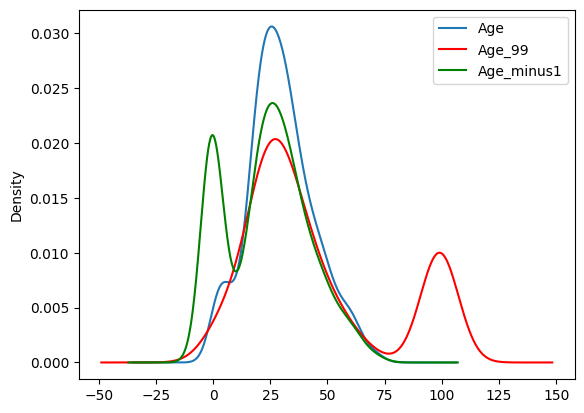

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
x_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
x_train['Age_99'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
x_train['Age_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

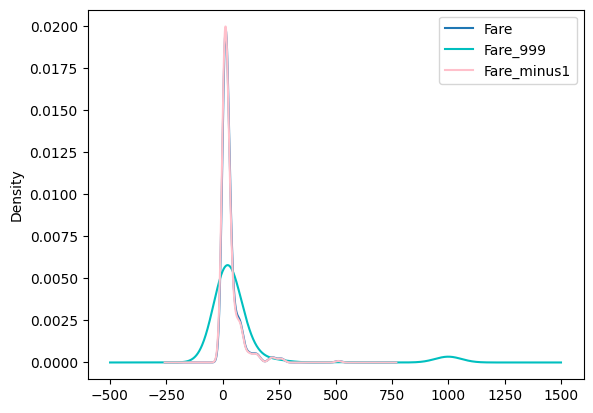

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
x_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
x_train['Fare_999'].plot(kind='kde', ax=ax, color='c')

# variable imputed with the mean
x_train['Fare_minus1'].plot(kind='kde', ax=ax, color='pink')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [24]:
x_train.cov()

,Age,Fare,Family,Age_99,Age_minus1,Fare_99,Fare_minus1,Fare_999
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,162.793430,63.321188,162.793430
Fare,70.719262,2448.197914,17.258917,-101.671097,125.558364,2448.197914,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-7.387287,-4.149246,11.528625,16.553989,11.528625
Age_99,204.349513,-101.671097,-7.387287,951.727557,-189.535540,-159.931663,-94.317400,-159.931663
Age_minus1,204.349513,125.558364,-4.149246,-189.535540,318.089620,257.379887,114.394141,257.379887
Fare_99,162.793430,2448.197914,11.528625,-159.931663,257.379887,47219.202652,762.474982,47219.202652
Fare_minus1,63.321188,2448.197914,16.553989,-94.317400,114.394141,762.474982,2378.567678,762.474982
Fare_999,162.793430,2448.197914,11.528625,-159.931663,257.379887,47219.202652,762.474982,47219.202652


In [25]:
x_train.corr()

,Age,Fare,Family,Age_99,Age_minus1,Fare_99,Fare_minus1,Fare_999
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.051179,0.084585,0.051179
Fare,0.092644,1.000000,0.208268,-0.066273,0.142022,1.000000,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.144787,-0.140668,0.032079,0.205233,0.032079
Age_99,1.000000,-0.066273,-0.144787,1.000000,-0.344476,-0.023857,-0.062687,-0.023857
Age_minus1,1.000000,0.142022,-0.140668,-0.344476,1.000000,0.066411,0.131514,0.066411
Fare_99,0.051179,1.000000,0.032079,-0.023857,0.066411,1.000000,0.071946,1.000000
Fare_minus1,0.084585,1.000000,0.205233,-0.062687,0.131514,0.071946,1.000000,0.071946
Fare_999,0.051179,1.000000,0.032079,-0.023857,0.066411,1.000000,0.071946,1.000000


In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [27]:
imputer1 = SimpleImputer(strategy='constant', fill_value=99)
imputer2 = SimpleImputer(strategy='constant', fill_value=999)

In [28]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
])

In [29]:
trf.fit(x_train)

ColumnTransformer(transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [30]:
trf.named_transformers_['imputer1'].statistics_

array([99.])

In [31]:
trf.named_transformers_['imputer2'].statistics_

array([999.])

In [33]:
x_train = trf.transform(x_train)
x_test = trf.transform(x_test)

In [34]:
x_train

array([[ 40.    ,  27.7208],
       [  4.    ,  16.7   ],
       [ 47.    ,   9.    ],
       ...,
       [ 71.    ,  49.5042],
       [ 99.    , 221.7792],
       [ 99.    ,  25.925 ]])